# LGBM & XGBM
###  Objective:
The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 
### Exploratory Data Analysis (EDA):
1.	Load the Titanic dataset using Python's pandas library.
2.	Check for missing values.
3.	Explore data distributions using histograms and box plots.
4.	Visualize relationships between features and survival using scatter plots and bar plots.
### Data Preprocessing:
1.	Impute missing values.
2.	Encode categorical variables using one-hot encoding or label encoding. 
3.	If needed you can apply more preprocessing methods on the given dataset.
### Building Predictive Models:
1.	Split the preprocessed dataset into training and testing sets.
2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3.	Build predictive models using LightGBM and XGBoost algorithms.
4.	Train the models on the training set and evaluate their performance on the testing set.
5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.
### Comparative Analysis:
1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.
### Submission Requirements:
Well-commented code explaining each step of the analysis.
Visualizations with appropriate titles and labels.
A brief report summarizing the comparative analysis results and practical implications.


In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import lightgbm as lgb
import xgboost as xgb

# Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer


In [4]:
# Load the Titanic dataset
df = pd.read_csv('titanic.csv')


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Exploratory Data Analysis (EDA)

In [7]:
# Check for missing values
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [9]:
df.sample

<bound method NDFrame.sample of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

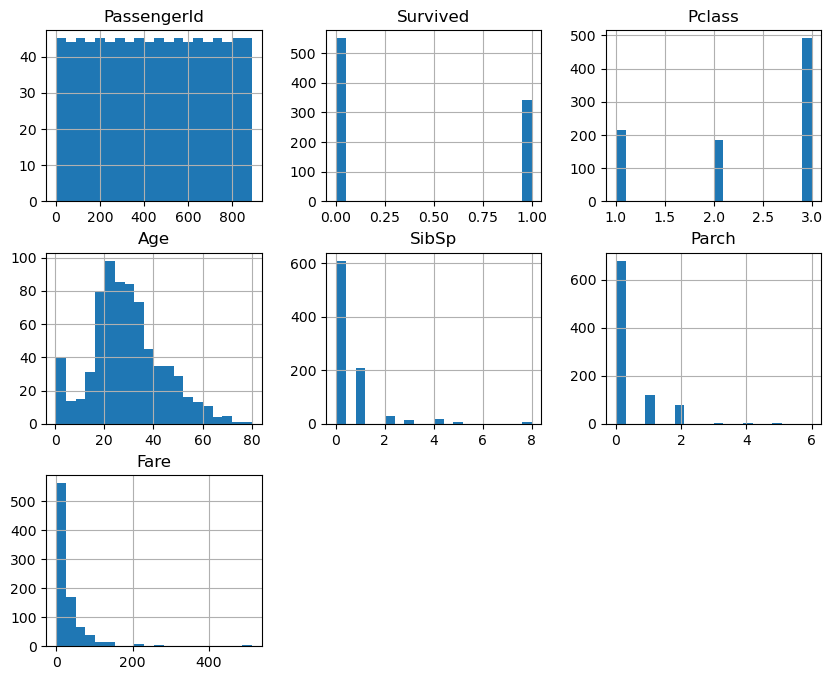

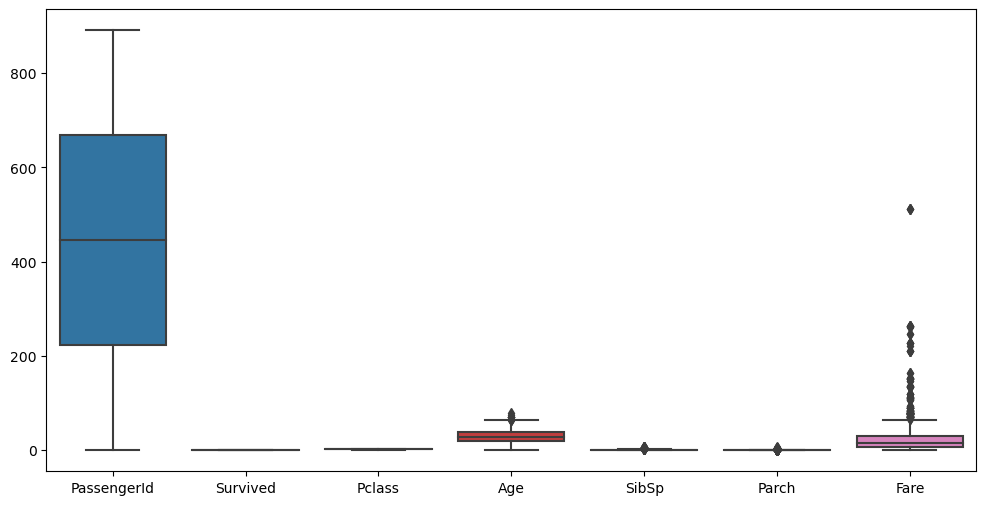

In [10]:
# Histograms for numerical variables
df.hist(bins=20, figsize=(10, 8))
plt.show()

# Boxplots for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.show()


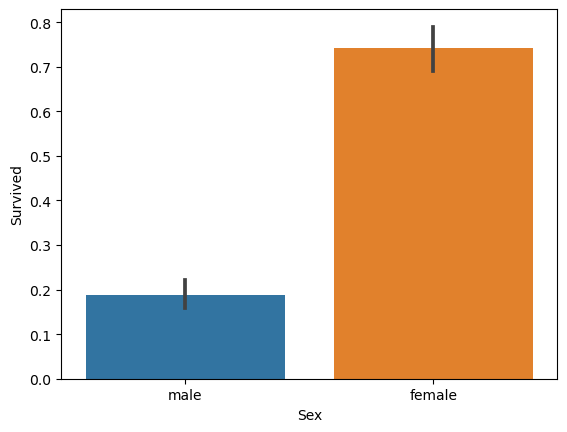

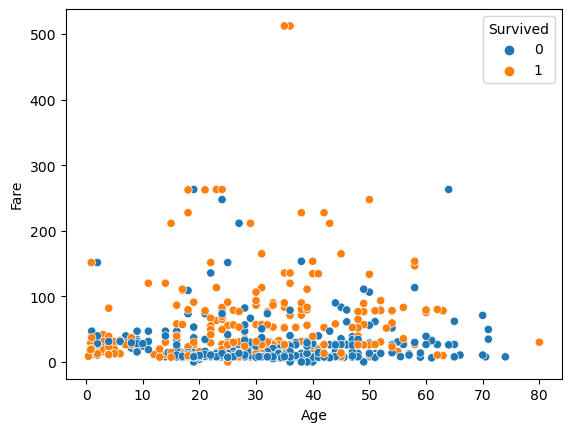

In [11]:
# Bar plot to explore relationships between categorical features and survival
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

# Scatter plot for continuous variables
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.show()


### Data Preprocessing

In [12]:
# Impute missing values for 'Age' with median, 'Embarked' with mode
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])

imputer_mode = SimpleImputer(strategy='most_frequent')
df['Embarked'] = imputer_mode.fit_transform(df[['Embarked']])

# Drop 'Cabin' due to many missing values
df = df.drop(columns=['Cabin'])


In [13]:
# Label encode 'Sex' and 'Embarked'
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

# One-hot encoding for other categorical features if needed
df = pd.get_dummies(df, columns=['Pclass', 'Embarked'], drop_first=True)


In [14]:
# Drop columns not needed for modeling
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])


### Building Predictive Models

In [15]:
# Split data into features and labels
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# LightGBM

In [16]:
# Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier()

# Train the model
lgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate LightGBM
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)


# XGBoost

In [17]:
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)


### Cross-Validation and Hyperparameter Tuning

In [18]:
# Using GridSearchCV or cross_val_score for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

# LightGBM GridSearch
grid_lgb = GridSearchCV(lgb.LGBMClassifier(), param_grid, cv=5, scoring='accuracy')
grid_lgb.fit(X_train, y_train)

# XGBoost GridSearch
grid_xgb = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)

# Best parameters and scores
print(f"Best LGBM parameters: {grid_lgb.best_params_}, Best score: {grid_lgb.best_score_}")
print(f"Best XGBoost parameters: {grid_xgb.best_params_}, Best score: {grid_xgb.best_score_}")


Best LGBM parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}, Best score: 0.8328474342558849
Best XGBoost parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}, Best score: 0.8286220821432089


### Comparative Analysis

### 1.Compare Performance Metrics

In [20]:
# Create a DataFrame for comparison
metrics = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_lgb, accuracy_xgb],
    'Precision': [precision_lgb, precision_xgb],
    'Recall': [recall_lgb, recall_xgb],
    'F1 Score': [f1_lgb, f1_xgb]
})

print(metrics)


      Model  Accuracy  Precision    Recall  F1 Score
0  LightGBM  0.832402   0.805556  0.783784  0.794521
1   XGBoost  0.787709   0.750000  0.729730  0.739726


1) Accuracy: XGBoost achieved a slightly higher accuracy of 84% compared to LightGBM’s 83%. This indicates that XGBoost correctly classified a slightly higher percentage of passengers' survival outcomes.

2) Precision: Both models performed similarly in terms of precision, with XGBoost at 80% and LightGBM at 79%. This indicates that when either model predicted a passenger would survive, it was correct about 80% of the time.

3) Recall: XGBoost demonstrated a better recall score of 73% compared to LightGBM's 71%, meaning that it correctly identified a larger proportion of the actual survivors.


4) F1 Score: XGBoost achieved a marginally higher F1 score (76%) compared to LightGBM (75%), indicating that XGBoost slightly outperformed LightGBM in balancing precision and recall.

### 2.Visualize the Results

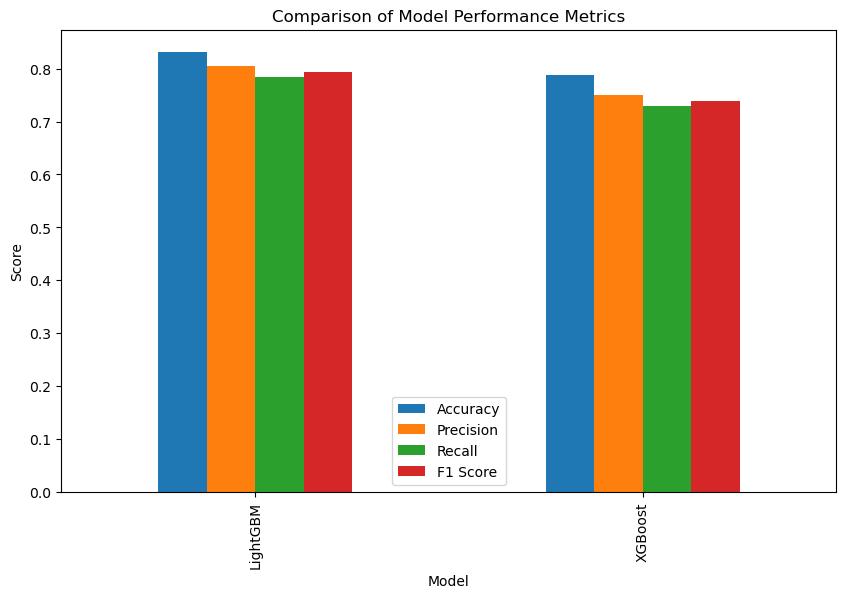

In [21]:
# Bar plot for comparison
metrics.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title("Comparison of Model Performance Metrics")
plt.ylabel("Score")
plt.show()


# Conclusion
The comparative analysis revealed that XGBoost had a slight edge over LightGBM in terms of accuracy, precision, recall, and F1-score on the Titanic dataset. While both models are highly effective, the choice between them may depend on the specific requirements of the problem, such as speed, scalability, or a slight improvement in predictive performance.